# **1.Context & Objetive**

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.


- Predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# **2.Data information**


- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# **3.Library & Import Data**

In [ ]:
#Import library
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# import file from googlesheet
gsheetid= "1Ojo2DAylAZKfgf87TD_8XK8f5hUQ1aiYt5q0G5VWm2A"
sheet_name ='healthcare-dataset-stroke-data'
gsheet_url= "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheetid,sheet_name)
df = pd.read_csv(gsheet_url)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **4.EDA**

## 4.1 Feature datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 4.2 Statistics of Categorical & Numerical data

In [ ]:
## check statistics of NUmericaldata
round (df.describe(include= ['float64','int64']),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [ ]:
## check statistics of categorical data
df.describe(include= ['object'] )

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
## check values count of gender column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
## visualize statistics of categorical & numerical data
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3)
ax1 = fig.add_trace(px.box(df, y="avg_glucose_level",).data[0], row=1, col=1)
fig.update_xaxes(title_text = "AVG_Glucose", row = 1 , col=1)
fig.update_traces(marker=dict(color='#4d759a'),row = 1 , col=1)
ax2 = fig.add_trace(px.box(df, y="bmi").data[0], row=1, col=2)
fig.update_xaxes(title_text = "BMI", row = 1 , col=2)
fig.update_traces(marker=dict(color='#44aa99'),row = 1 , col=2)
ax2 = fig.add_trace(px.box(df, y="age").data[0], row=1, col=3)
fig.update_xaxes(title_text = "Age", row = 1 , col=3)
fig.update_traces(marker=dict(color='#dfa700'),row = 1 , col=3)
fig.update_layout(title="AVG_Glucose, BMI, Age boxplot")
fig.show()

- Cột BMI có Null values
- Cột Age chưa đúng datatypes
- Cần binning các cột Age, AVG_glucose_level, bmi
- loại bỏ "Other" trong cột gender

## 4.3 Fill Null data, change dtpe Feature 'Age' and binning data


In [ ]:
## Drop single "other" gender
df = df[(df['gender']!= 'Other')]

In [ ]:
## Fill with mean value
df['bmi'].fillna(df['bmi'].mean(), inplace= True)

<ipython-input-11-51c9287d066b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# change Colums 'age' to int
df=df.astype({"age":'int'})

In [ ]:
# binning data columns "age", "avg_glucose", "bmi"
df2=df.copy()
df2['age_group'] = pd.cut(df2['age'], bins=[0,12,18,30,60,100], labels = ['Children','Adolescents',"Young-Adults","Middle-adults","Elderly"])
df2['Glucose_group'] = pd.cut(df2['avg_glucose_level'], bins=[0,90,160,230,500], labels = ['Low','Normal','High',"Very high"])
df2['bmi_group'] = pd.cut(df2['bmi'], bins=[0, 19, 25,30,100], labels = ['Under weight','Normal','Over weight',"Obesity"])

In [ ]:
df2 =df2[['id','gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group', 'Glucose_group',	'bmi_group','stroke']]

## 4.4 Insight Data

   stroke  values
0       0    4860
1       1     249
[Text(0.5, 1.0, 'Stroke vs No Stroke')]


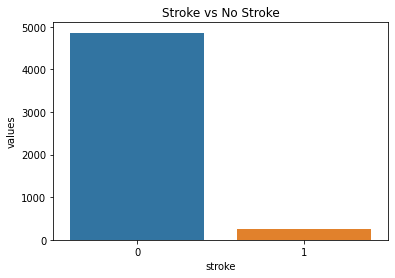

In [ ]:
## Group by stroke
df_stroke = df2.groupby(by='stroke').agg(values=("stroke","count")).reset_index()
## bar chart with seaborn
stroke_chart = sns.barplot(data = df_stroke, x='stroke',y='values').set(title= "Stroke vs No Stroke")
print(df_stroke)
print(stroke_chart)

### 4.4.1 Distribution of age and age of stroke

<Axes: title={'center': ' Distribution of Age'}, ylabel='Frequency'>

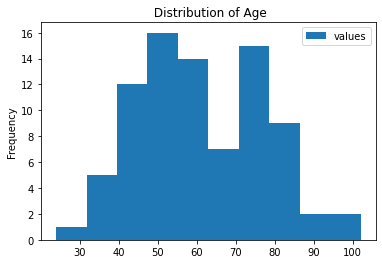

In [ ]:
## distribution of age
df_age = df.groupby(by='age').agg(values=("stroke","count")).reset_index()
df_age.plot(kind ="hist", x = 'age', title =" Distribution of Age")

[Text(0.5, 1.0, 'Distribution age of patien with Stroke')]

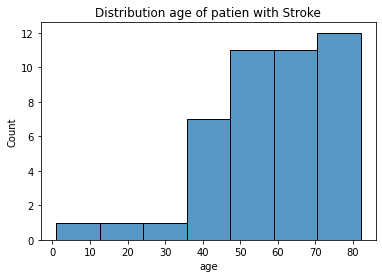

In [ ]:
## distribution age of stroke
df_distribution = df[df['stroke'] == 1]
df_distribution = df_distribution.groupby(by = 'age').agg(values=("stroke","count")).reset_index()
sns.histplot(data = df_distribution, x='age'). set(title = "Distribution age of patien with Stroke")

### 4.4.2 Distribution of Glucose on stroke

[Text(0.5, 1.0, 'Distribution of glucose')]   Glucose_group  values
0           Low    2405
1        Normal    2036
2          High     549
3     Very high     119


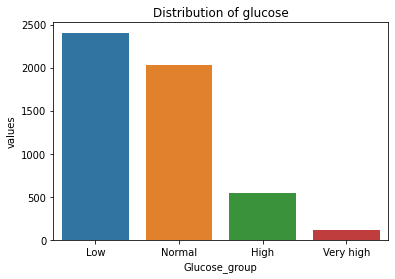

In [ ]:
## distribution of glucose
df_glucose = df2.groupby(by='Glucose_group').agg(values =("stroke","count")).reset_index()
chart_glucose = sns.barplot(data=df_glucose , x="Glucose_group", y="values").set(title = "Distribution of glucose")
print(chart_glucose,df_glucose)

  Glucose_group  values
0           Low      89
1        Normal      71
2          High      71
3     Very high      18 [Text(0.5, 1.0, 'Distribution of glucose on stroke')]


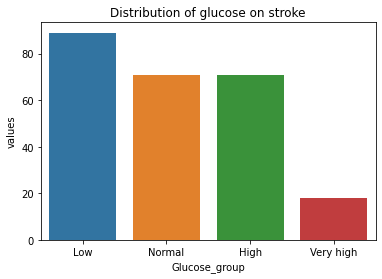

In [ ]:
## Distribution of glucose by patien with stroke
df_dist_glu = df2[df2['stroke'] == 1]
df_dist_glu= df_dist_glu.groupby(by='Glucose_group').agg(values =("stroke","count")).reset_index()
chart_glucose_stroke = sns.barplot(data=df_dist_glu, x="Glucose_group", y="values").set(title = "Distribution of glucose on stroke")
print(df_dist_glu,chart_glucose_stroke)

### 4.4.3 Distribution of BMI and stroke

      bmi_group  values
0  Under weight     411
1        Normal    1195
2   Over weight    1610
3       Obesity    1893 [Text(0.5, 1.0, 'Distribution of bmi')]


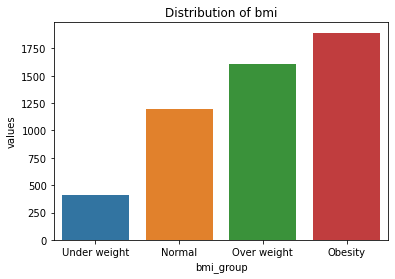

In [ ]:
## distribution of bmi
df_bmi = df2.groupby(by='bmi_group').agg(values =("stroke","count")).reset_index()
chart_bmi = sns.barplot(data=df_bmi , x="bmi_group", y="values").set(title = "Distribution of bmi")
print(df_bmi,chart_bmi)

      bmi_group  values
0  Under weight       1
1        Normal      37
2   Over weight     115
3       Obesity      96 [Text(0.5, 1.0, 'Distribution of bmi on stroke')]


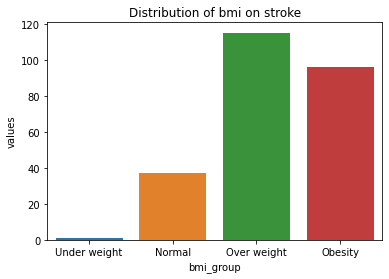

In [ ]:
## distribution of bmi with stroke
df_dist_bmi = df2[df2['stroke'] == 1]
df_dist_bmi= df_dist_bmi.groupby(by='bmi_group').agg(values =("stroke","count")).reset_index()
chart_dist_bmi_stroke = sns.barplot(data=df_dist_bmi, x="bmi_group", y="values").set(title = "Distribution of bmi on stroke")
print(df_dist_bmi,chart_dist_bmi_stroke)

### 4.4.4 Relation of Categorical data with Stroke 

In [ ]:
## create new dataframe df3
df3 = df2.copy()

In [ ]:
## Replace values in colums hypertension, hear_disease and stroke
df3['hypertension'].replace({0 : 'No hypertension', 1:'Hypertension'},inplace= True)
df3['heart_disease'].replace({0 : 'No heart_disease', 1:'Heart_disease'},inplace= True)
df3['stroke'].replace({0 : 'No stroke', 1:'stroke'},inplace= True)

In [ ]:
##def countplot_applicants_stroke(features):
    ##for feature in features:
        ##plt.figure(figsize=(6, 6))
        ##ax=sns.countplot( y= df3[feature],data=df3, hue = 'Stroke')
        ##plt.legend(loc='best')
        ##total = len(df3[feature])
        ##for p in ax.patches:
            ##percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            ##x = p.get_x() + p.get_width() + 0.02
            ##y = p.get_y() + p.get_height()/2
            ##ax.annotate(percentage, (x, y))
    ##plt.show()
##countplot_applicants(['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status'])

In [ ]:
## Create datafram for only stroke
df3_stroke = df3[df3['stroke'] == 'stroke']
## Draw chart of categorical data with stroke
def countplot_applicants_stroke(features):
    for feature in features:
        plt.figure(figsize=(6, 6))
        ax=sns.countplot( y= df3_stroke[feature],data=df3_stroke)
        plt.legend(loc='best')
        total = len(df3_stroke[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

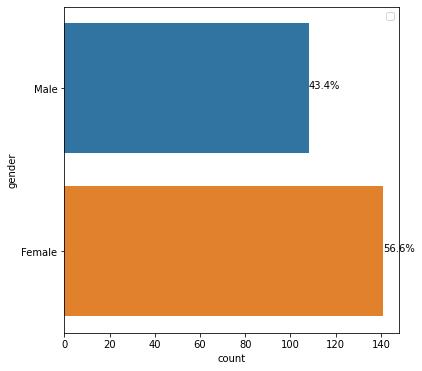

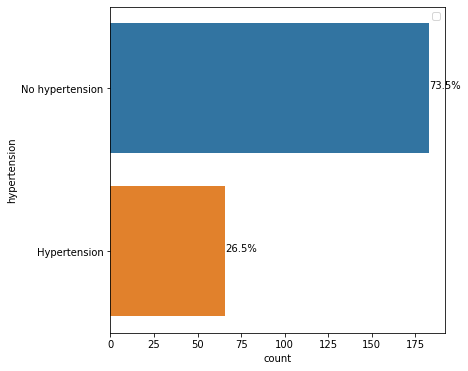

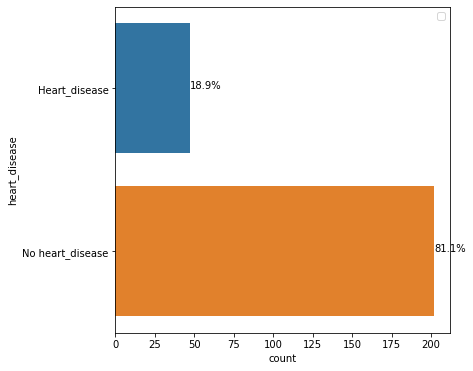

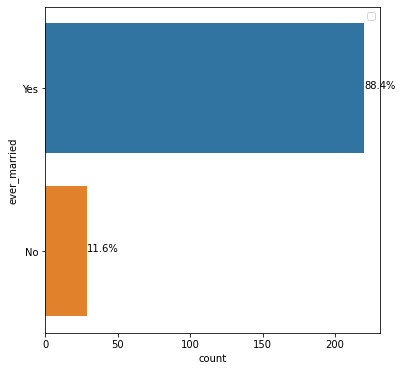

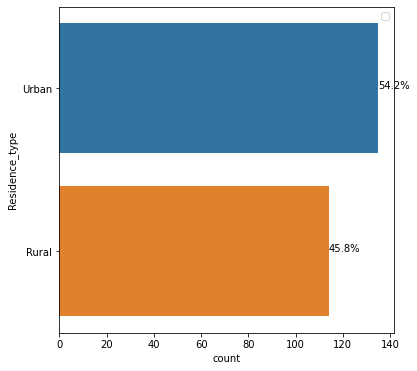

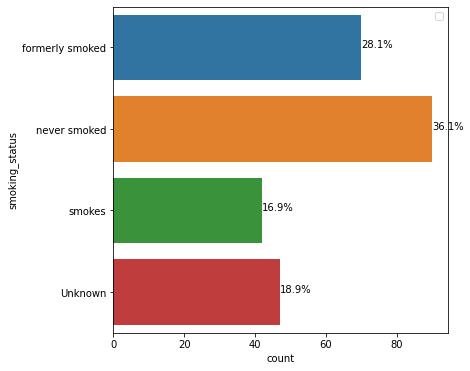

In [ ]:
countplot_applicants_stroke(['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status'])

### 4.4.5 Insight 

1.   Age và BMI có ảnh hưởng rõ tới stroke, những người có tuổi hoặc bị quá cân có xu hướng bị stroke nhiều hơn.
2.   Glucose chưa thể hiện rõ mối tương quan với  stroke.
3. trong những người bị stroke thì tỉ lệ nữ giới chiếm 56.6% còn nam giới chiếm 43.4%
4. Hypertension cũng k tương quan rõ với việc bị stroke, những người bị stroke và  hypertension chiếm 26.5% trên tổng những người bị stroke
5. Tương tự với hypertension thì Heart_Disease cũng k thể hiện rõ sự tương quan với Stroke
6. Những người đã có gia đình có tỉ lệ bị stroke cao hơn hẳn với những người chưa có gia đình (chiếm 88.4%)
6. những người ở thành thị cũng có xu hướng bị Stroke cao hơn là những người ở nông thôn




# **5. Modeling**

In [ ]:
## Import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

### 5.1 Enconding data

In [ ]:
## Label Encoder categorical data
col = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group', 'Glucose_group',	'bmi_group']
df2[col]=df2[col].apply(LabelEncoder().fit_transform)

In [ ]:
df2.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age_group,Glucose_group,bmi_group,stroke
0,9046,1,0,1,1,2,1,1,2,0,1,1
1,51676,0,0,0,1,3,0,2,2,0,2,1
2,31112,1,0,1,1,2,0,2,2,2,1,1
3,60182,0,0,0,1,2,1,3,3,0,1,1
4,1665,0,1,0,1,3,0,2,2,0,0,1


   stroke  values
0       0    4860
1       1     249
[Text(0.5, 1.0, 'Stroke vs No Stroke')]


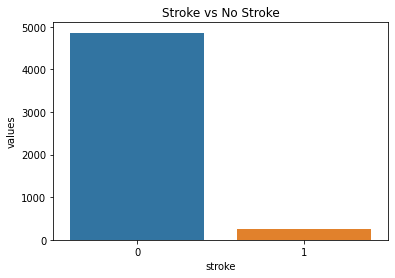

In [ ]:
stroke_chart = sns.barplot(data = df_stroke, x='stroke',y='values').set(title= "Stroke vs No Stroke")
print(df_stroke)
print(stroke_chart)

Data đang bị mất cân bằng

### 5.2 Balance Data

In [ ]:
## Choose x and y
y=df2['stroke']
X=df2[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'age_group',
       'Glucose_group', 'bmi_group']]

In [ ]:
X

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age_group,Glucose_group,bmi_group
0,1,0,1,1,2,1,1,2,0,1
1,0,0,0,1,3,0,2,2,0,2
2,1,0,1,1,2,0,2,2,2,1
3,0,0,0,1,2,1,3,3,0,1
4,0,1,0,1,3,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,1,2,1,2,2,1,2
5106,0,0,0,1,3,1,2,2,2,1
5107,0,0,0,1,3,0,2,3,1,1
5108,1,0,0,1,2,0,1,3,0,2


In [ ]:
## Divide X_train and y_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4087, 10) (4087,)
Test set: (1022, 10) (1022,)


In [ ]:
## use SMOTE for balance Data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=4)
X_train2, y_train2 = smote.fit_resample(X_train, y_train)

In [ ]:
print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7776, 10) (7776,)
Test set: (1022, 10) (1022,)


### 5.3 NAVIE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
grid_gnb = GridSearchCV(gnb, param_grid=param_grid, cv=5, scoring = 'recall')

In [ ]:
grid_gnb.fit(X_train2, y_train2)
print("Best Parameters: ", grid_gnb.best_params_)
##Best Parameters:  {'var_smoothing': 1e-09}

Best Parameters:  {'var_smoothing': 1e-09}


In [ ]:
gnb = GaussianNB(var_smoothing= 1e-09)
y_pred_gnb = gnb.fit(X_train2, y_train2).predict(X_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_gnb).sum()))

Number of mislabeled points out of a total 1022 points : 284


In [ ]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       972
           1       0.12      0.74      0.21        50

    accuracy                           0.72      1022
   macro avg       0.55      0.73      0.52      1022
weighted avg       0.94      0.72      0.80      1022



### 5.4 Mnb

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

In [ ]:
##grid_mnb =GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring = 'f1')
##grid_mnb.fit(X_train2,y_train2)

In [ ]:
##print("Best Parameters: ", grid_mnb.best_params_)
##Best Parameters:  {'alpha': 0.1, 'fit_prior': False}

In [ ]:
mnb = MultinomialNB(alpha = 0.1, fit_prior = False)
y_predict_mnb = mnb.fit(X_train2, y_train2).predict(X_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_predict_mnb).sum()))

Number of mislabeled points out of a total 1022 points : 309


In [ ]:
print(classification_report(y_test, y_predict_mnb))

              precision    recall  f1-score   support

           0       0.97      0.70      0.82       972
           1       0.09      0.58      0.16        50

    accuracy                           0.70      1022
   macro avg       0.53      0.64      0.49      1022
weighted avg       0.93      0.70      0.78      1022



### 5.5 Logistic Regression

In [ ]:
## Call parameter for Lr
lr = LogisticRegression()
param_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.1, 1, 20],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
}

In [ ]:
## find best parameter for lr
##grid_lr =GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
##grid_lr.fit(X_train2, y_train2)
##print("Best hyperparameters: ", grid_lr.best_params_)
##Best hyperparameters:  {'C': 0.0001, 'penalty': 'l2'}

In [ ]:
stroke_lr = LogisticRegression(C = 0.0001,  penalty='l2')
y_pred_lr= stroke_lr.fit(X_train2,y_train2).predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       972
           1       0.08      0.48      0.14        50

    accuracy                           0.70      1022
   macro avg       0.52      0.60      0.48      1022
weighted avg       0.92      0.70      0.79      1022



In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test, y_pred_lr), '%')

Accuracy of LR is: 70.45009784735812 %


### 5.6 DECISION TREE

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
stroke_dt = tree.DecisionTreeClassifier()

In [ ]:
stroke_dt = tree.DecisionTreeClassifier(criterion= "gini", max_depth= 7, min_samples_leaf= 1, min_samples_split= 5)
y_predict_dt = stroke_dt.fit(X_train2,y_train2).predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_dt))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83       972
           1       0.10      0.62      0.18        50

    accuracy                           0.72      1022
   macro avg       0.54      0.67      0.51      1022
weighted avg       0.93      0.72      0.80      1022



In [ ]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
text_representation = tree.export_text(stroke_dt)
print(text_representation)

|--- feature_7 <= 2.50
|   |--- feature_7 <= 1.50
|   |   |--- feature_4 <= 3.50
|   |   |   |--- feature_4 <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  2.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 1.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  1.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_4 >  3.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- feature_9 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_9 >  1.50
|   |   |   |   |   |   |   |--- class: 

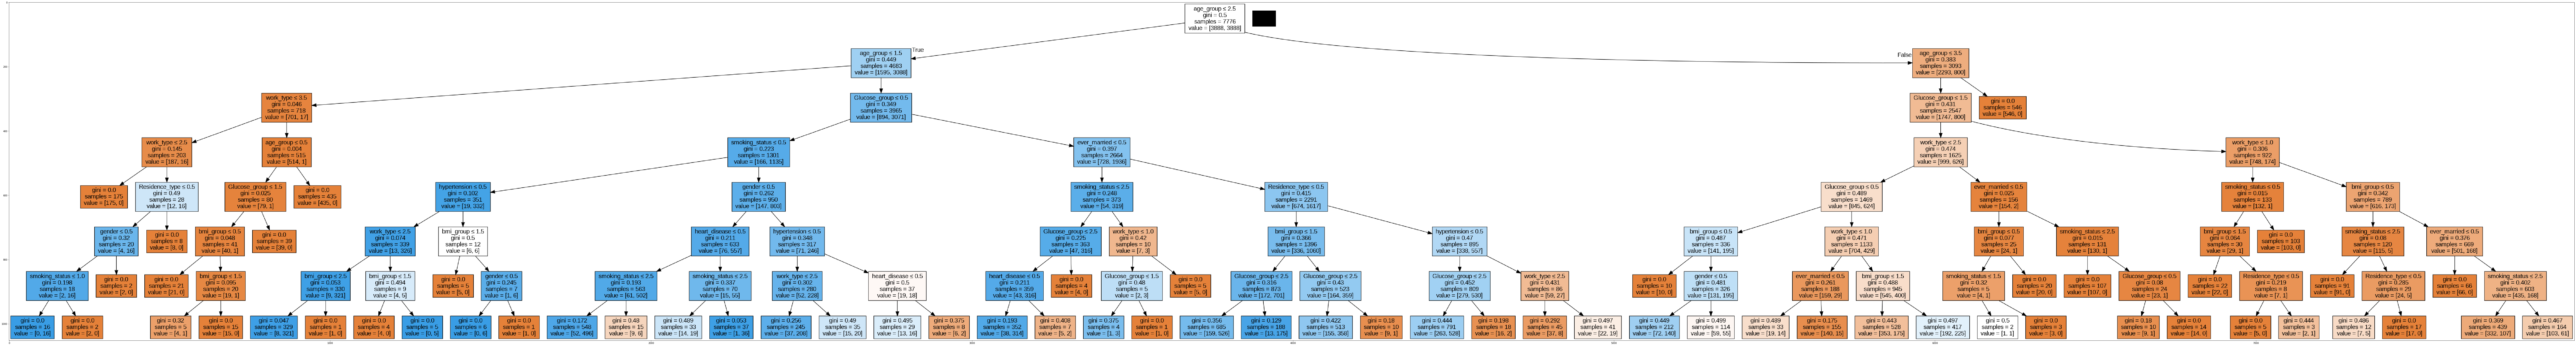

In [ ]:
dot_data = StringIO()
filename = "stroketree.png"
featureNames = df2.columns[1:11]
targetNames = df2["stroke"].unique().tolist()
out=tree.export_graphviz(stroke_dt, feature_names=featureNames, out_file=dot_data, class_names= None, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')

###  5.7 RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
stroke_forest = RandomForestClassifier()
## param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [0, 10]}
## grid_fr = GridSearchCV(stroke_forest, param_grid, cv=5, scoring='accuracy')

In [ ]:
## grid_fr.fit(X_train2, y_train2)

In [ ]:
## Tunning Hyperparameters for random forest
## print("Best hyperparameters: ", grid_fr.best_params_)

In [ ]:
Stroke_forest = RandomForestClassifier(n_estimators=50, max_depth=10)
y_predict_forest = Stroke_forest.fit(X_train2, y_train2).predict(X_test)
print(classification_report(y_test, y_predict_forest))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       972
           1       0.12      0.50      0.19        50

    accuracy                           0.79      1022
   macro avg       0.54      0.65      0.54      1022
weighted avg       0.93      0.79      0.85      1022



### 5.8 SVM

In [ ]:
from sklearn import svm
stroke_svm =svm.SVC(kernel='linear')
stroke_svm.fit(X_train2,y_train2)

SVC(kernel='linear')

In [ ]:
y_prdict_svm = stroke_svm.fit(X_train2,y_train2).predict(X_test)

In [ ]:
print(classification_report(y_test, y_prdict_svm))

              precision    recall  f1-score   support

           0       0.97      0.66      0.79       972
           1       0.09      0.62      0.15        50

    accuracy                           0.66      1022
   macro avg       0.53      0.64      0.47      1022
weighted avg       0.93      0.66      0.76      1022



### 5.9 knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs

In [ ]:
## grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1,20)},cv=5, scoring='accuracy')

In [ ]:
## grid_knn.fit(X_train2,y_train2)

In [ ]:
## print("Best hyperparameters: ", grid_knn.best_params_)

In [ ]:
stroke_knn = KNeighborsClassifier(n_neighbors=11)
stroke_knn.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_predict_knn = stroke_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       972
           1       0.11      0.32      0.16        50

    accuracy                           0.84      1022
   macro avg       0.53      0.59      0.54      1022
weighted avg       0.92      0.84      0.87      1022



### 5.10 Result


In [ ]:
print("Accuracy of GNB is:", round((100 * accuracy_score(y_test, y_pred_gnb)),2), '%')
print("Accuracy of MNB is:", round((100 * accuracy_score(y_test, y_predict_mnb)),2), '%')
print("Accuracy of LR is:", round((100 * accuracy_score(y_test, y_pred_lr)),2), '%')
print("Accuracy of Decision Tree is:", round((100 * accuracy_score(y_test,y_predict_dt)),2), '%')
print("Accuracy of Random Forest is:", round((100 * accuracy_score(y_test,y_predict_forest)),2), '%')
print("Accuracy of SVM is:", round((100 * accuracy_score(y_test, y_prdict_svm)),2), '%')
print("Accuracy of knn is:", round((100 * accuracy_score(y_test,y_predict_knn)),2), '%')

Accuracy of GNB is: 72.21 %
Accuracy of MNB is: 69.77 %
Accuracy of LR is: 70.45 %
Accuracy of Decision Tree is: 72.21 %
Accuracy of Random Forest is: 79.35 %
Accuracy of SVM is: 65.95 %
Accuracy of knn is: 83.76 %


3 models có số acurracy cao nhất là:   
- Decision Tree : 72.11 %
- Random Forest : 78.6%
- knn là : 84%


# **6.Boosting**

### 4.1 Test with ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier()
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.5, 1.0]}

In [ ]:
# Fit the model on the training data
##grid_ada = GridSearchCV(ada, param_grid=param_grid, scoring='accuracy', cv=5)
##grid_ada.fit(X_train2,y_train2)
## print("Best Hyperparameters: ", grid_ada.best_params_)

In [ ]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 1, min_samples_split= 5),n_estimators=150, learning_rate=0.1)
y_predict_ada = ada.fit(X_train2, y_train2).predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict_ada))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       972
           1       0.06      0.20      0.09        50

    accuracy                           0.81      1022
   macro avg       0.51      0.52      0.49      1022
weighted avg       0.91      0.81      0.86      1022



### 6.2 Test with GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Gra = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4]
}

# Perform Grid Search CV
grid_gra = GridSearchCV(estimator=Gra, param_grid=param_grid, cv=5, n_jobs=-1)

In [ ]:
## Fit the model on the training data
## grid_gra.fit(X_train2, y_train2)
## print("Best Parameters: ", grid_gra.best_params_)

In [ ]:
gra = GradientBoostingClassifier(learning_rate= 1, max_depth=4, min_samples_split= 4, n_estimators= 150)
y_predict_gra= gra.fit(X_train2, y_train2).predict(X_test)
print(classification_report(y_test, y_predict_gra))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       972
           1       0.07      0.26      0.11        50

    accuracy                           0.79      1022
   macro avg       0.51      0.54      0.50      1022
weighted avg       0.91      0.79      0.84      1022



### 6.3 Test with XGBoost

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

In [ ]:
# Perform Grid Search CV
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)

In [ ]:
## Fit the model on the training data
##grid_xgb.fit(X_train2,y_train2)
##print("Best Parameters: ", grid_gra.best_params_)

In [ ]:
y_predict_xgb = xgb.fit(X_train2, y_train2).predict(X_test)
print(classification_report(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       972
           1       0.07      0.28      0.12        50

    accuracy                           0.79      1022
   macro avg       0.51      0.55      0.50      1022
weighted avg       0.91      0.79      0.84      1022



### 6.4 Test with Light GBM


In [ ]:
import lightgbm as lgb
Lig = lgb.LGBMClassifier()
param_grid = {
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 150],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

In [ ]:
##grid_lightgbm = GridSearchCV(estimator=Lig, param_grid=param_grid, cv=5, n_jobs=-1)
##grid_lightgbm.fit(X_train2,y_train2)
##print("Best Parameters: ", grid_search.best_params_)

In [ ]:
Lig = lgb.LGBMClassifier()
y_predict_lightgbm = Lig.fit(X_train2, y_train2).predict(X_test)
print(classification_report(y_test, y_predict_lightgbm))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       972
           1       0.08      0.34      0.13        50

    accuracy                           0.77      1022
   macro avg       0.52      0.57      0.50      1022
weighted avg       0.92      0.77      0.83      1022



### 6.5 Result

In [ ]:
print("Accuracy of Adaboost is:", round((100 * accuracy_score(y_test, y_predict_ada)),2),'%')
print("Accuracy of Gradientboost is:", round((100 * accuracy_score(y_test, y_predict_gra)),2),'%')
print("Accuracy of xgb is:", round((100 * accuracy_score(y_test, y_predict_xgb)),2),'%')
print("Accuracy of  Light GBM is:", round((100 * accuracy_score(y_test, y_predict_lightgbm)),2),'%')

Accuracy of Adaboost is: 81.12 %
Accuracy of Gradientboost is: 79.26 %
Accuracy of xgb is: 78.96 %
Accuracy of  Light GBM is: 77.1 %


#  **6.Conclusion**



1.   Sau khi kiểm tra insigh data thì BMI và Age là 2 chỉ số chính có thể dùng để dự đoán tỉ lệ Stroke
2. Các model có số acurracy cao là Knn 84%, Adaboost 81%, Gradient và xgb là 79%
3. Tuy nhiên do đây là bài toán phân loại Stroke, việc phân loại sai cũng có thể gây ảnh hưởng đến con người nên phải xét đến các chỉ số f1, Precision và Recall
4.trong các model thì Navie Bayes trả về kết quả của Precision Recall và f1_score cao nhất   
5. => Chọn model Naives Bayes


| Model| Accuracy|Precision| Recall| F1_Score|
|-------------------|----------------||-------------------|----------------|
| Navie Bayes |72% | 12%|74%|21%|
| Mnb      |70%|9%|58%|16%|
| Logistic Regresion| 70%|8%| 48%|14%|
| Decision Tree | 72%|10%|62%|18%|
| Random Forest | 79%|11%|48%|18%|
| SVM | 66%|9%|62%|15%|
| KNN | 84%|11%|32%|16%|
|Adaboost | 81%|6%|20%|9%|
|Gradien | 79%|7%|26%|11%|
|Xgb| 79% |7%|28%|12%|
|Light GBM | 77%|8%|34%|13%|

#  **7.Evaluate Model**

## 7.1 Confusion Metrix Naives Bayes

In [ ]:
from sklearn.metrics import confusion_matrix
gnb_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_matrix 

array([[701, 271],
       [ 13,  37]])

Text(0.5, 15.0, 'Predict')

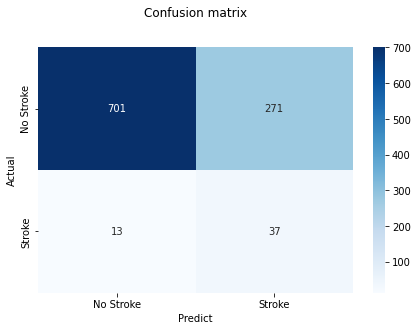

In [ ]:
x_labels = ["No Stroke","Stroke"]
y_labels = ["No Stroke","Stroke"]
# create heatmap
sns.heatmap(pd.DataFrame(gnb_matrix), annot=True, cmap="Blues" ,fmt='g', xticklabels = x_labels, yticklabels = y_labels)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

## 7.2 Compute evaluation metrics

In [ ]:
## Check accuracy, precision, recall và f1_score
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
f1_score = f1_score(y_test, y_pred_gnb)

In [ ]:
print('Accuracy', 100*round((accuracy),2),'%')
print("Precision",  100*round((precision),2),'%')
print("recall",  100*round((recall),2),'%')
print("f1_score",  100*round((f1_score),2),'%')

In [ ]:
## Check FPR and FNR
print('False positive rate = FP/(FP + TN) = ', round((271/(271 +701)*100),2),'%')
print('False negative rate = FN/(TP+FN) = ',(13/(37+13))*100,'%')
print('True positive rate = TP/(TP+FP) = ',(37/(37+271))*100,'%') 

False positive rate = FP/(FP + TN) =  27.88 %
False negative rate = FN/(TP+FN) =  26.0 %
True positive rate = TP/(TP+FP) =  12.012987012987013 %


Với Accuracy là 72%,
-  trong tổng 308 người được dự đoán là bị stroke thì chỉ có 37 thực sự bị stroke (được thể hiện qua Precision = 12%)
- trong tổng số 50 người thực sự bị stroke, thì mô hình đã phát hiện 37 (recall = 74%) 
- tỉ lệ dự đoán sai của những người bị stroke là FNR = 26%
- tỉ lệ báo động nhầm của mo hình là FPR 27.88%

## 7.3 ROC and AUC

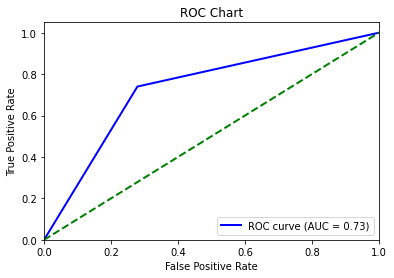

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_pred and y_true are the predicted and true labels, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart')
plt.legend(loc="lower right")
plt.show()

AUC = 0.73